# Building structured multi-plot grids

In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(style="ticks")

In [3]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


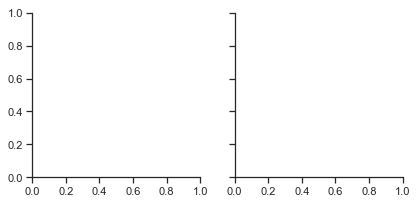

In [4]:
g = sns.FacetGrid(tips, col="time")
plt.show()

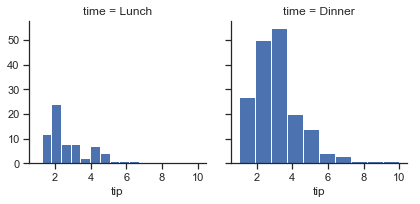

In [5]:
g = sns.FacetGrid(tips, col="time")
g.map(plt.hist, "tip")

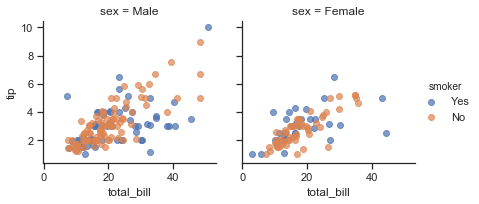

In [6]:
g = sns.FacetGrid(tips, col="sex", 
                  hue="smoker")
g.map(plt.scatter, "total_bill", 
      "tip", alpha=0.7)
g.add_legend()
plt.show()

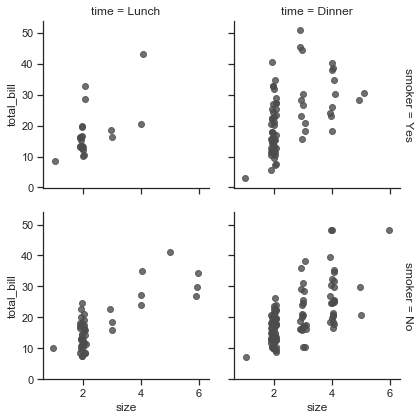

In [7]:
g = sns.FacetGrid(tips, row="smoker", 
                  col="time", margin_titles=True)
g.map(sns.regplot, "size", 
      "total_bill", color="0.3", 
      fit_reg=False, x_jitter=0.1)
plt.show()

c:\users\ashwin\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\users\ashwin\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


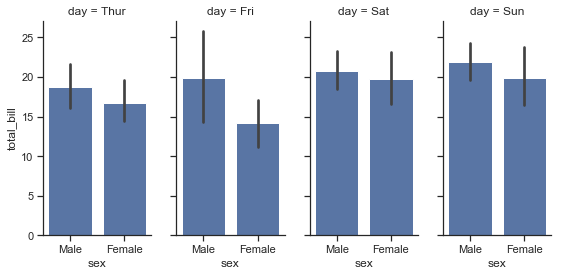

In [8]:
g = sns.FacetGrid(tips, col="day", 
                  height=4, aspect=0.5)
g.map(sns.barplot, "sex", "total_bill")
plt.show()

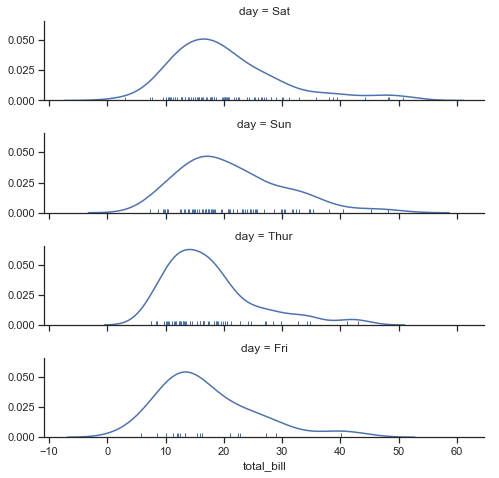

In [10]:
ordered_days = tips.day.value_counts().index
g = sns.FacetGrid(tips, row="day", 
                  row_order=ordered_days,
                  height=1.7, aspect=4,)
g.map(sns.distplot, "total_bill", 
      hist=False, rug=True)
g.add_legend()
plt.show()

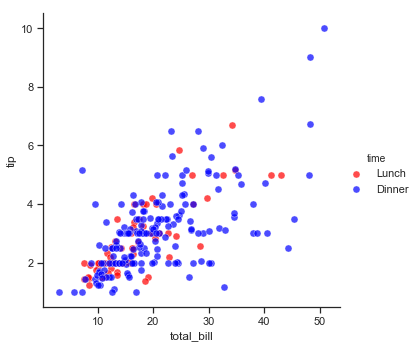

In [14]:
pal = dict(Lunch="red", 
           Dinner="blue")
g = sns.FacetGrid(tips, hue="time", 
                  palette=pal, height=5)
g.map(plt.scatter, "total_bill", "tip", 
      s=50, alpha=0.7, linewidth=0.5, 
      edgecolor="white")
g.add_legend()
plt.show()

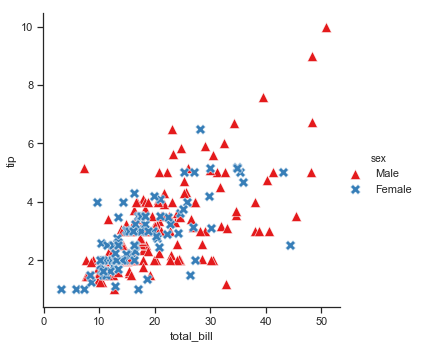

In [19]:
g = sns.FacetGrid(tips, hue="sex", 
                  palette="Set1", height=5, 
                  hue_kws={"marker": ["^", "X"]})
g.map(plt.scatter, "total_bill", "tip", 
      s=100, linewidth=0.5, edgecolor="white")
g.add_legend()
plt.show()

In [20]:
attend = sns.load_dataset("attention").query("subject <= 12")
attend

,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0
5,5,6,divided,1,5.0
6,6,7,divided,1,5.0
7,7,8,divided,1,5.0
8,8,9,divided,1,2.0
9,9,10,divided,1,6.0


c:\users\ashwin\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


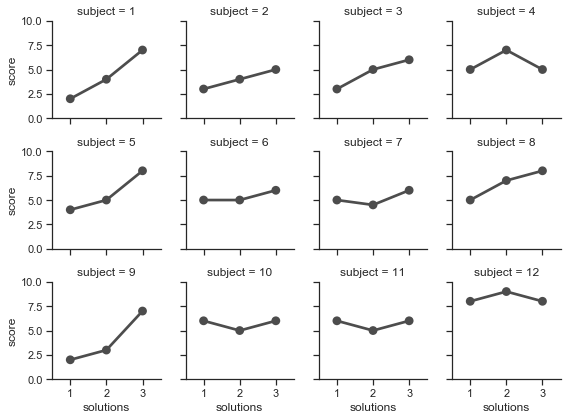

In [21]:
g = sns.FacetGrid(attend, col="subject", 
                  col_wrap=4, height=2, ylim=(0, 10))
g.map(sns.pointplot, "solutions", "score", 
      color="0.3", ci=None)
plt.show()

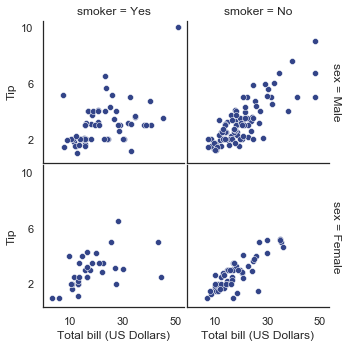

In [22]:
with sns.axes_style("white"):
    g = sns.FacetGrid(tips, row="sex", col="smoker", 
                      margin_titles=True, height=2.5)
g.map(plt.scatter, "total_bill", "tip", color="#334488", 
      edgecolor="white", lw=0.5)
g.set_axis_labels("Total bill (US Dollars)", "Tip")
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10])
g.fig.subplots_adjust(wspace=0.02, hspace=0.02)
plt.show()

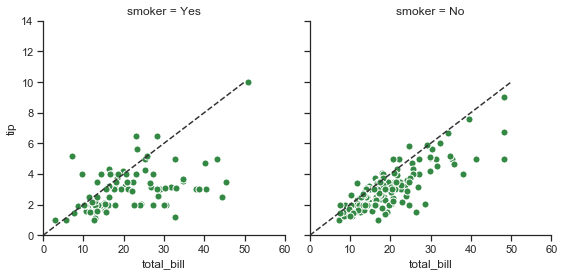

In [23]:
g = sns.FacetGrid(tips, col="smoker", margin_titles=True, height=4)
g.map(plt.scatter, "total_bill", "tip", 
      color="#338844", edgecolor="white", s=50, lw=1)
for ax in g.axes.flat:
    ax.plot((0, 50), (0, 0.2 * 50), c="0.2", ls="--")
g.set(xlim=(0, 60), ylim=(0, 14))
plt.show()

## Using custom functions

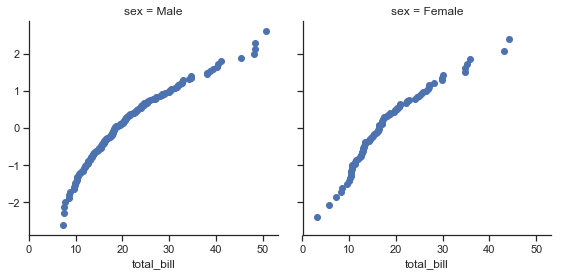

In [24]:
from scipy import stats
def quantile_plot(x, **kwargs):
    qntls, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, qntls, **kwargs)

g = sns.FacetGrid(tips, col="sex", height=4)
g.map(quantile_plot, "total_bill")
plt.show()

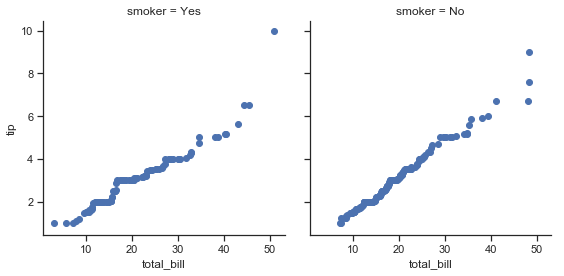

In [25]:
def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)

g = sns.FacetGrid(tips, col="smoker", height=4)
g.map(qqplot, "total_bill", "tip")
plt.show()

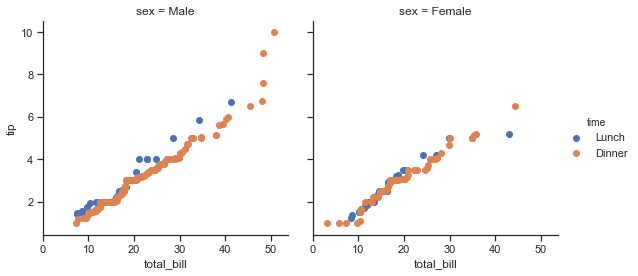

In [26]:
g = sns.FacetGrid(tips, hue="time", 
                  col="sex", height=4)
g.map(qqplot, "total_bill", "tip")
g.add_legend()
plt.show()

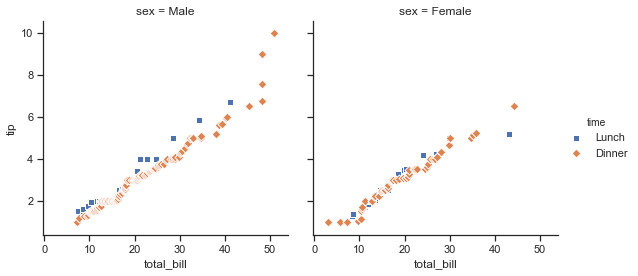

In [27]:
g = sns.FacetGrid(tips, hue="time", col="sex", height=4,
                  hue_kws={"marker": ["s", "D"]})
g.map(qqplot, "total_bill", "tip", s=40, edgecolor="w")
g.add_legend()
plt.show()

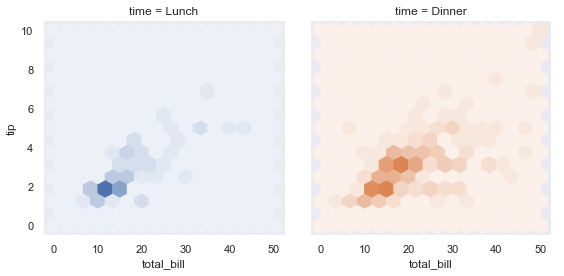

In [28]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g = sns.FacetGrid(tips, hue="time", col="time", height=4)
g.map(hexbin, "total_bill", "tip", extent=[0, 50, 0, 10])
plt.show()

## Plotting pairwise data relationships

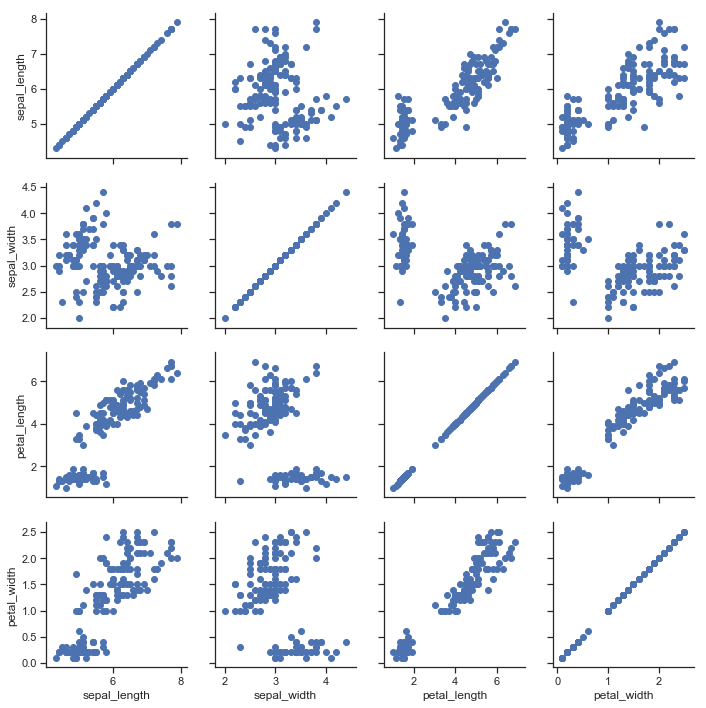

In [29]:
iris = sns.load_dataset("iris")
g = sns.PairGrid(iris)
g.map(plt.scatter)
plt.show()

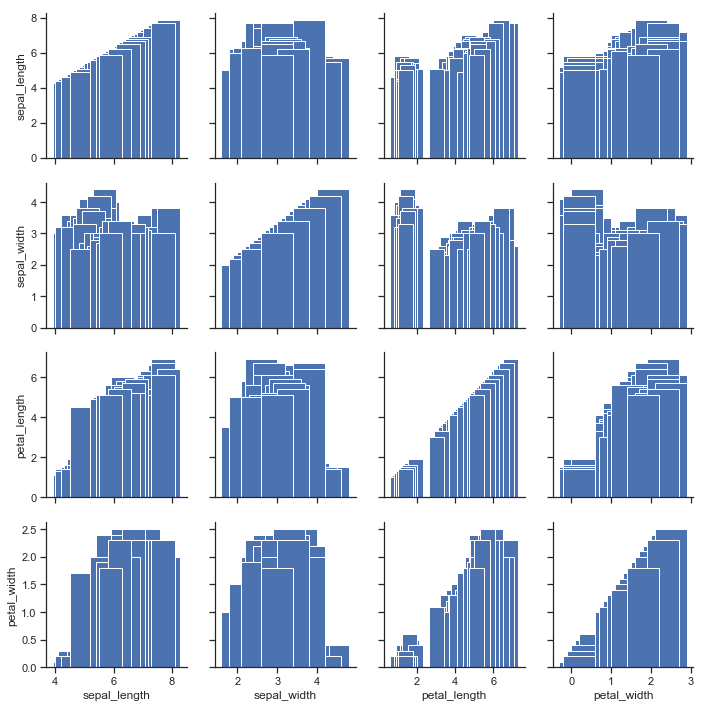

In [30]:
iris = sns.load_dataset("iris")
g = sns.PairGrid(iris)
g.map(plt.bar)
plt.show()

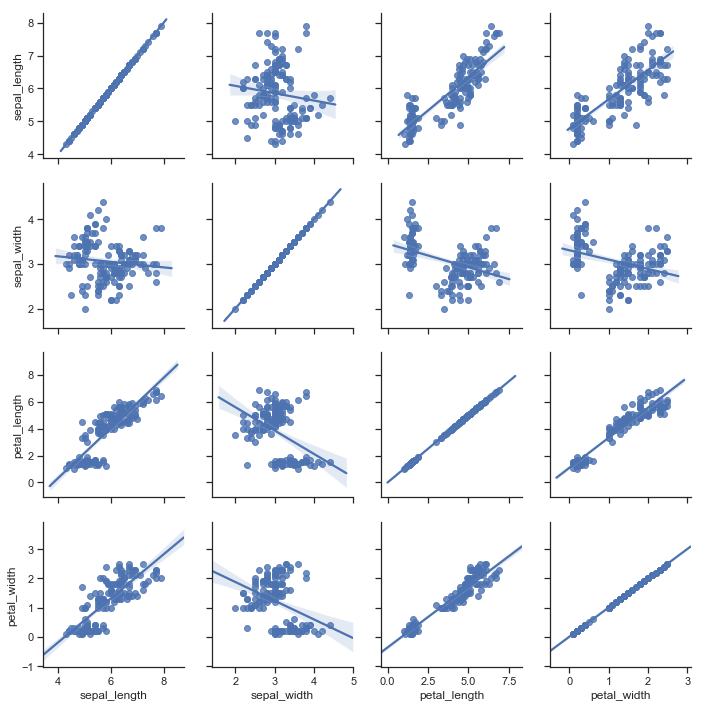

In [33]:
iris = sns.load_dataset("iris")
g = sns.PairGrid(iris)
g.map(sns.regplot)
plt.show()

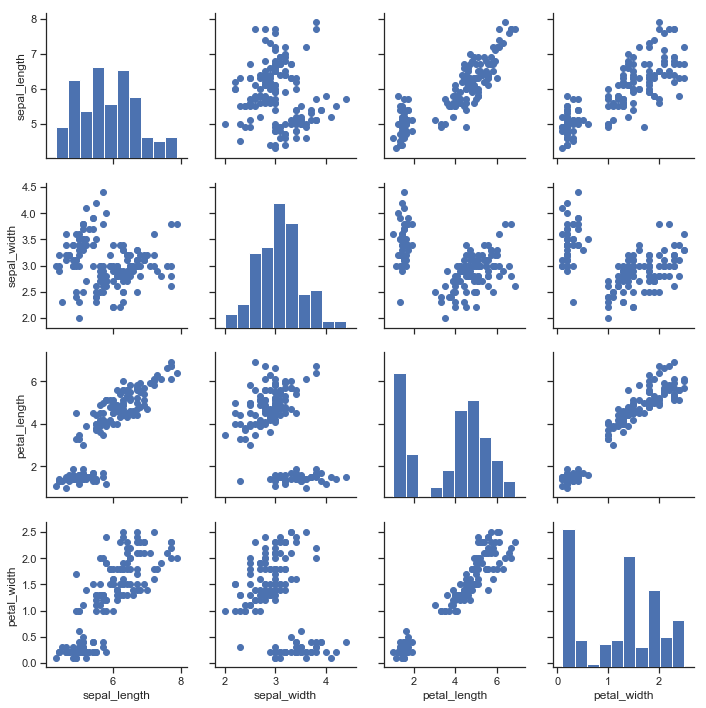

In [34]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.show()

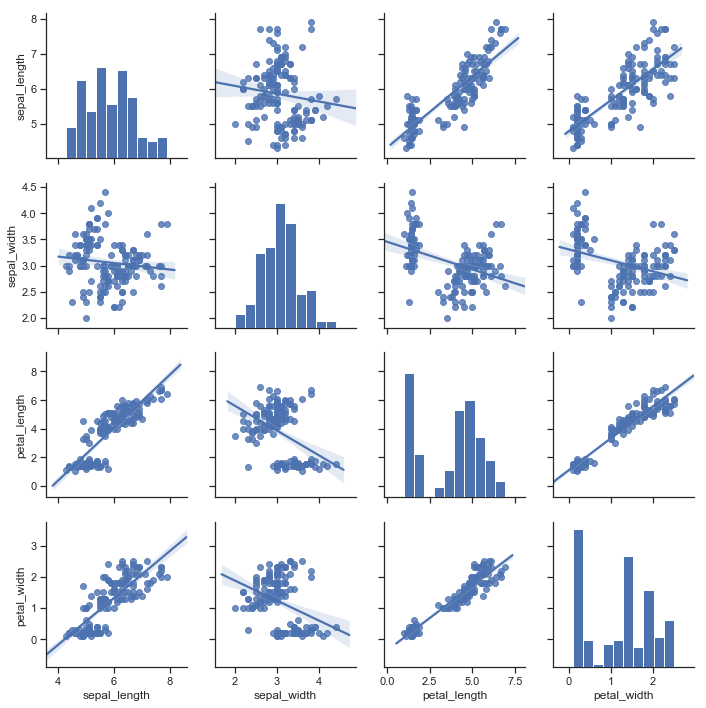

In [35]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_offdiag(sns.regplot)
plt.show()

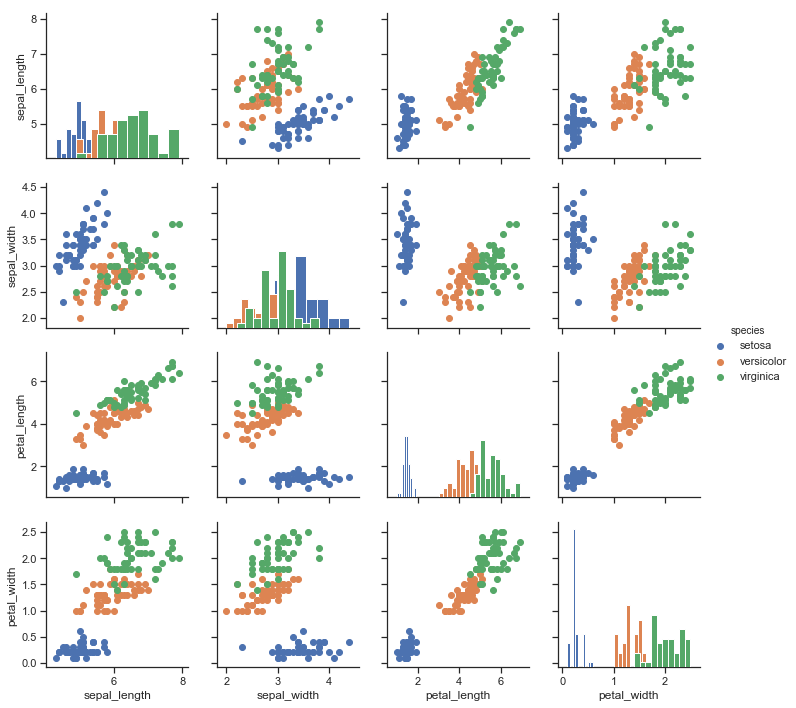

In [36]:
g = sns.PairGrid(iris, hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()

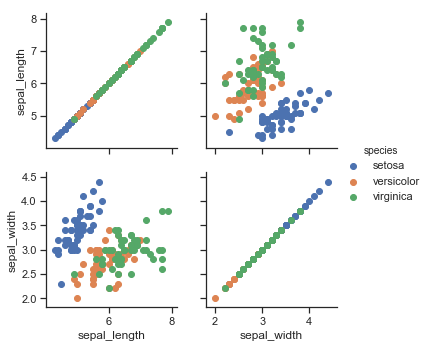

In [37]:
g = sns.PairGrid(iris, vars=["sepal_length", "sepal_width"], 
                 hue="species")
g.map(plt.scatter)
g.add_legend()
plt.show()

c:\users\ashwin\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\legend.py:449: UserWarning: The handle <matplotlib.patches.Patch object at 0x1C440C10> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


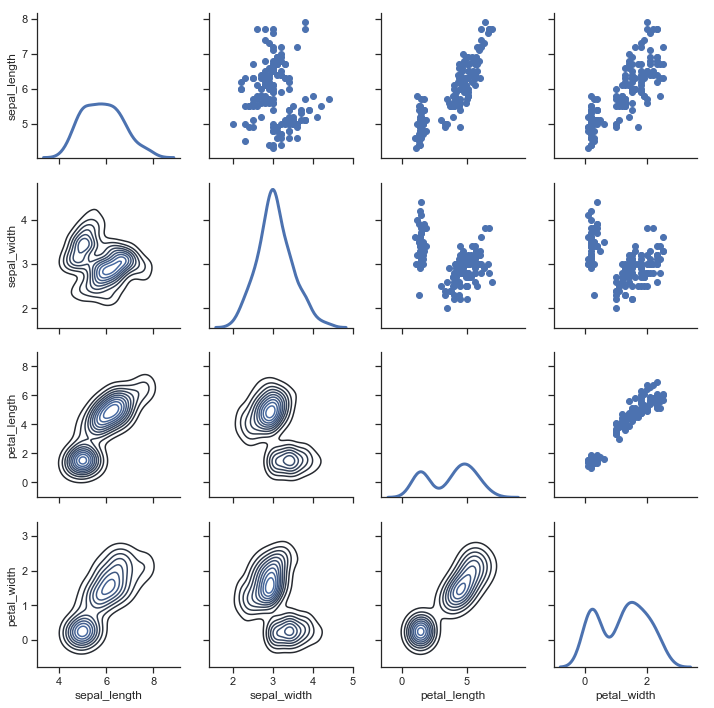

In [38]:
g = sns.PairGrid(iris)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, 
           legend=False)
g.add_legend()
plt.show()

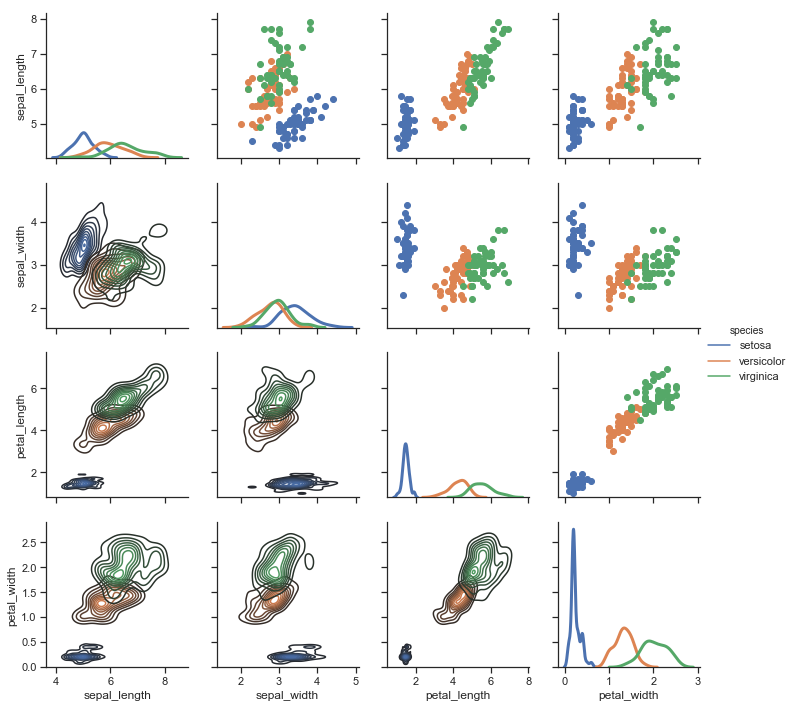

In [39]:
g = sns.PairGrid(iris, hue="species")
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, 
           legend=False)
g.add_legend()
plt.show()

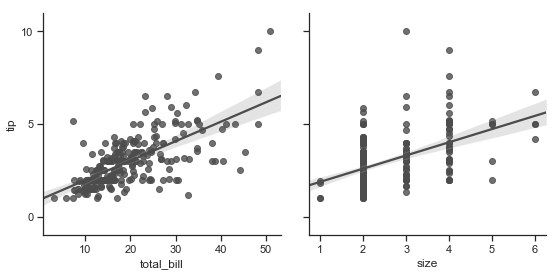

In [40]:
g = sns.PairGrid(tips, y_vars=["tip"], 
                 x_vars=["total_bill", "size"], height=4)
g.map(sns.regplot, color="0.3")
g.set(ylim=(-1, 11), yticks=[0, 5, 10])
plt.show()

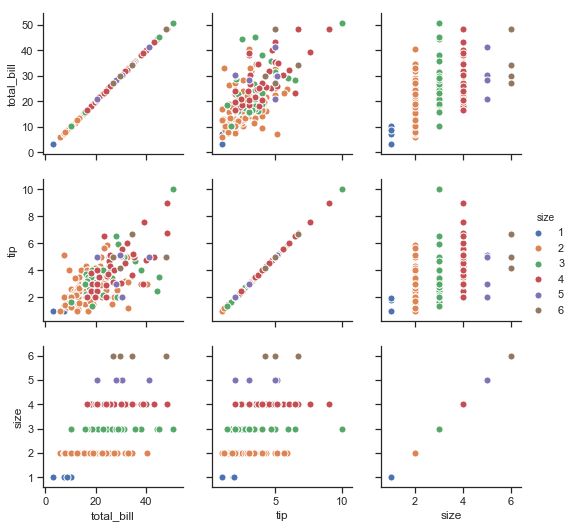

In [43]:
g = sns.PairGrid(tips, hue="size", )
#                 palette="GnBu_d")
g.map(plt.scatter, s=50, 
      edgecolor="white")
g.add_legend()
plt.show()

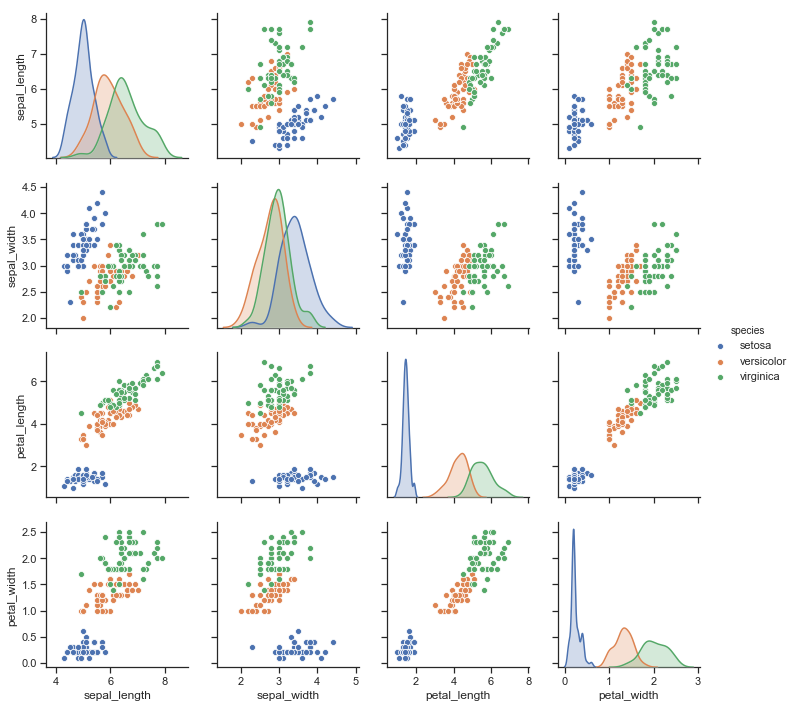

In [44]:
sns.pairplot(iris, hue="species", 
             height=2.5)
plt.show()

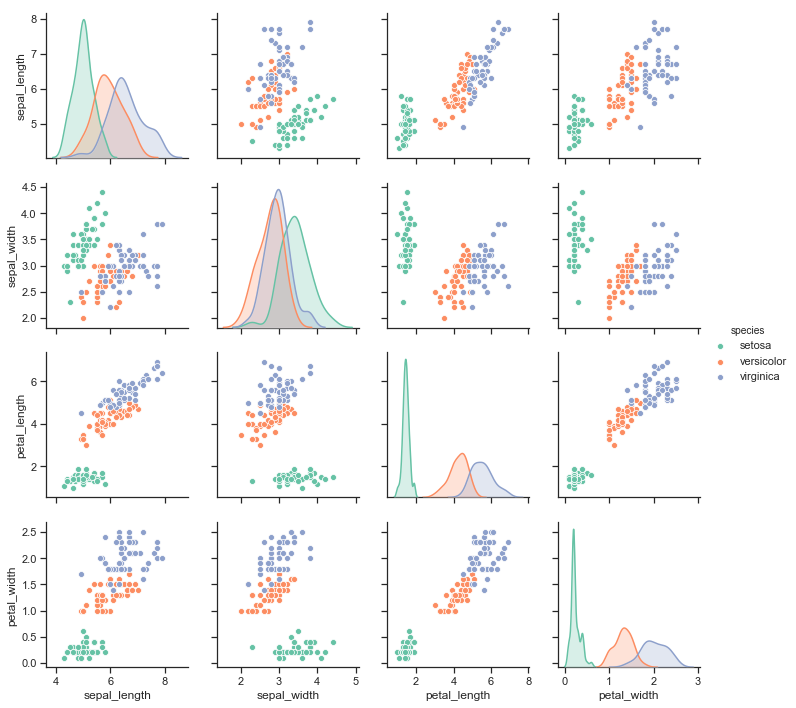

In [45]:
sns.pairplot(iris, hue="species", palette="Set2", 
             diag_kind="kde", height=2.5)
plt.show()